In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

/home/mye/lang_project/python14-env/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [ ]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str
    personality: str

def asking_age(state: AgentState)->AgentState:
    """Asking a person His age"""
    state["personality"] = f" My name is {state['name']} and I am {state['age']} years old. "
    return state
def  experience(state: AgentState) -> AgentState:
    """Asking skills the know """
    state["personality"] = state["personality"] + f"I have an  experience in the following languages:" + ", ".join(state["skills"]) +"."
    return state

In [39]:
graph = StateGraph(AgentState)
graph.add_node("ager", asking_age)
graph.add_node("experiencer", experience)
graph.add_edge("ager", "experiencer")
graph.set_entry_point("ager")
graph.set_finish_point("experiencer")
app = graph.compile()

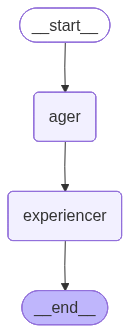

In [40]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [43]:
initial_state = {"name": "Mye", "age": 15, "skills": ["CSS", "Python", "Javascript", "SQL", "Postgress"]}
updated_state = app.invoke(initial_state)
print(updated_state["personality"])


 My namel is Mye and I am 15 years old. I have an  experience in the following languages:CSS, Python, Javascript, SQL, Postgress.
